In [1]:
from astropy.io import fits
import numpy as np 
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.stats import histogram
from astropy.io import ascii

In [2]:
file = r'C:\Users\ivonn\Documents\LAE\septiembre\SHELA_P12_N501_allband_merged_cat_feb2024.fits'

In [3]:
#file = '/home/ivonne/Desktop/proyecto/SHELA_P12_N501_allband_merged_cat_feb2024.fits'

In [4]:
hdul=fits.open(file)

In [5]:
hdul.info()

Filename: C:\Users\ivonn\Documents\LAE\septiembre\SHELA_P12_N501_allband_merged_cat_feb2024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  LDAC_OBJECTS    1 BinTableHDU    768   511305R x 189C   [J, E, E, D, D, D, D, J, J, D, D, I, J, J, 3E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 13E, 13E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 13E, 13E, E, E, 2A, I, J, J, 3E, E, E, E, E, E, E, E, E, E, E, 13E, 13E, E, E, E, E, E, E, E, E, 13E, 13E, I, J, J, 3E, E, E, E, E, E, E, E, E, E, E, 13E, 13E, E, E, E, E, E, E, E, E, 13E, 13E, I, J, J, 3E, E, E, E, E, E, E, E, E, E, E, 13E, 13E, E, E, E, E, E, E, E, E, 13E, 13E, I, J, J, 3E, E, E, E, E, E, E, E, E, E, E, 13E, 13E, E, E, E, E, E, E, E, E, 13E, 13E, I, J, J, 3E, E, E, E, E, E, E, E, E, E, E, 13E, 13E, E, E, E, E, E, E, E, E, 13E, 13E]   


In [6]:
datos= hdul['LDAC_OBJECTS'].data
print(datos.columns)

ColDefs(
    name = 'NUMBER'; format = 'J'; disp = 'I10'
    name = 'X_IMAGE'; format = 'E'; unit = 'pix'; disp = 'F11.4'
    name = 'Y_IMAGE'; format = 'E'; unit = 'pix'; disp = 'F11.4'
    name = 'X_WORLD'; format = 'D'; unit = 'deg'; disp = 'E18.10'
    name = 'Y_WORLD'; format = 'D'; unit = 'deg'; disp = 'E18.10'
    name = 'XWIN_IMAGE'; format = 'D'; unit = 'pix'; disp = 'F11.4'
    name = 'YWIN_IMAGE'; format = 'D'; unit = 'pix'; disp = 'F11.4'
    name = 'XPEAK_IMAGE'; format = 'J'; unit = 'pix'; disp = 'I10'
    name = 'YPEAK_IMAGE'; format = 'J'; unit = 'pix'; disp = 'I10'
    name = 'XWIN_WORLD'; format = 'D'; unit = 'deg'; disp = 'E18.10'
    name = 'YWIN_WORLD'; format = 'D'; unit = 'deg'; disp = 'E18.10'
    name = 'FLAGS'; format = 'I'; disp = 'I3'
    name = 'IMAFLAGS_ISO'; format = 'J'; disp = 'I9'
    name = 'NIMAFLAGS_ISO'; format = 'J'; disp = 'I9'
    name = 'FLUX_RADIUS'; format = '3E'; unit = 'pix'; disp = 'F10.3'; dim = '(3)'
    name = 'KRON_RADIUS'; format = 'E

In [7]:
tabla=Table(hdul['LDAC_OBJECTS'].data)

#print(tabla.colnames)
#len(tabla.colnames)

In [8]:
# extraccón MAG_APER y ERR
magaper = tabla['MAG_APER']
magerr_aper = tabla['MAGERR_APER']
#magaper

# Convierte la columna MAG_APER a una matriz NumPy
magaper_array = np.array(magaper.tolist())
magerr_aperarray = np.array(magerr_aper.tolist())

#Extrae la columna que necesitamos 
columna_3 = magaper_array[:, 3]
columnaerr_3 = magerr_aperarray[:,3]

# Añadir las columnas individuales de mag_aper y magerr_aper a la tabla original 
tabla['MAG_APER_3'] = columna_3
tabla['MAGERR_APER_3'] = columnaerr_3

In [9]:
colfilt=[name for name in tabla.colnames if len(tabla[name].shape) <= 1]
tabfilt=tabla[colfilt]
df=tabfilt.to_pandas()
#df

In [10]:
colsimp = ['NUMBER','X_WORLD','Y_WORLD','MAG_AUTO_G','MAGERR_AUTO_G', 'MAG_AUTO_R','MAGERR_AUTO_R', 'MAG_APER_3', 'MAGERR_APER_3','FLUX_AUTO_G','FLUXERR_AUTO_G','FLUX_AUTO_R','FLUXERR_AUTO_R','IMAFLAGS_ISO','FLAGS','CLASS_STAR','ELLIPTICITY','KRON_RADIUS','FWHM_WORLD' ]
tablita = tabfilt[colsimp]

#DataFrame donde se trabaja con los parámetros necesarios.

dt = tablita.to_pandas()
#dt

In [11]:
w501 = 0.85623
dt['gr_flux'] = w501* dt['FLUX_AUTO_G'] + (1 - w501)*dt['FLUX_AUTO_R']
dt

,NUMBER,X_WORLD,Y_WORLD,MAG_AUTO_G,MAGERR_AUTO_G,MAG_AUTO_R,MAGERR_AUTO_R,MAG_APER_3,MAGERR_APER_3,FLUX_AUTO_G,FLUXERR_AUTO_G,FLUX_AUTO_R,FLUXERR_AUTO_R,IMAFLAGS_ISO,FLAGS,CLASS_STAR,ELLIPTICITY,KRON_RADIUS,FWHM_WORLD,gr_flux
0,1,15.594019,-0.971049,24.910219,0.061518,24.376667,0.040580,24.843994,0.130524,1.086206e-10,6.152982e-12,1.775551e-10,6.634664e-12,0,24,0.841401,0.535198,4.345471,0.000498,1.185313e-10
1,2,15.454047,-0.970744,25.149097,0.074095,24.448353,0.041167,25.244364,0.175401,8.716874e-11,5.947266e-12,1.662105e-10,6.300487e-12,0,24,0.584171,0.259743,5.504766,0.000301,9.853257e-11
2,3,15.444664,-0.970722,25.141462,0.064009,24.124405,0.027522,25.220413,0.175062,8.778381e-11,5.173994e-12,2.239947e-10,5.676584e-12,0,24,0.504379,0.257851,4.723872,0.000328,1.073669e-10
3,4,15.290254,-0.970367,23.928955,0.091117,23.315063,0.050525,24.319271,0.189159,2.681745e-10,2.250020e-11,4.720350e-10,2.196113e-11,0,24,0.749033,0.150871,7.180055,0.000409,2.974835e-10
4,5,14.667002,-0.968978,23.112589,0.046351,22.292429,0.019835,23.751972,0.125198,5.688059e-10,2.427674e-11,1.210677e-09,2.211170e-11,0,24,0.828268,0.320155,4.912572,0.000444,6.610877e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511300,274862,16.961930,0.651559,23.632271,0.030901,23.236860,0.019541,24.235380,0.063422,3.524450e-10,1.002834e-11,5.072887e-10,9.127968e-12,0,0,0.215709,0.197803,3.500000,0.000614,3.747069e-10
511301,274863,16.773845,0.652467,23.152042,0.022164,22.063942,0.007988,24.410492,0.076357,5.485079e-10,1.119431e-11,1.494249e-09,1.099104e-11,0,0,0.003248,0.357633,3.500000,0.001209,6.844771e-10
511302,274864,17.341593,0.654685,24.552999,0.075629,24.496786,0.067176,24.895967,0.126730,1.509383e-10,1.051140e-11,1.589589e-10,9.832571e-12,0,0,0.539582,0.307777,5.399446,0.000685,1.520915e-10
511303,274865,16.342213,0.655671,24.259661,0.052181,24.236805,0.050526,24.855675,0.111535,1.977586e-10,9.502086e-12,2.019656e-10,9.396385e-12,0,0,0.372249,0.094799,5.257915,0.000702,1.983635e-10


In [12]:
#existen valores negativos en rg_flux 
dt['gr_flux_pos'] = dt.apply(lambda row: row['gr_flux'] > 0, axis=1)

#obtenemos 441124  objetos en total
dt = dt.loc[dt['gr_flux_pos']]


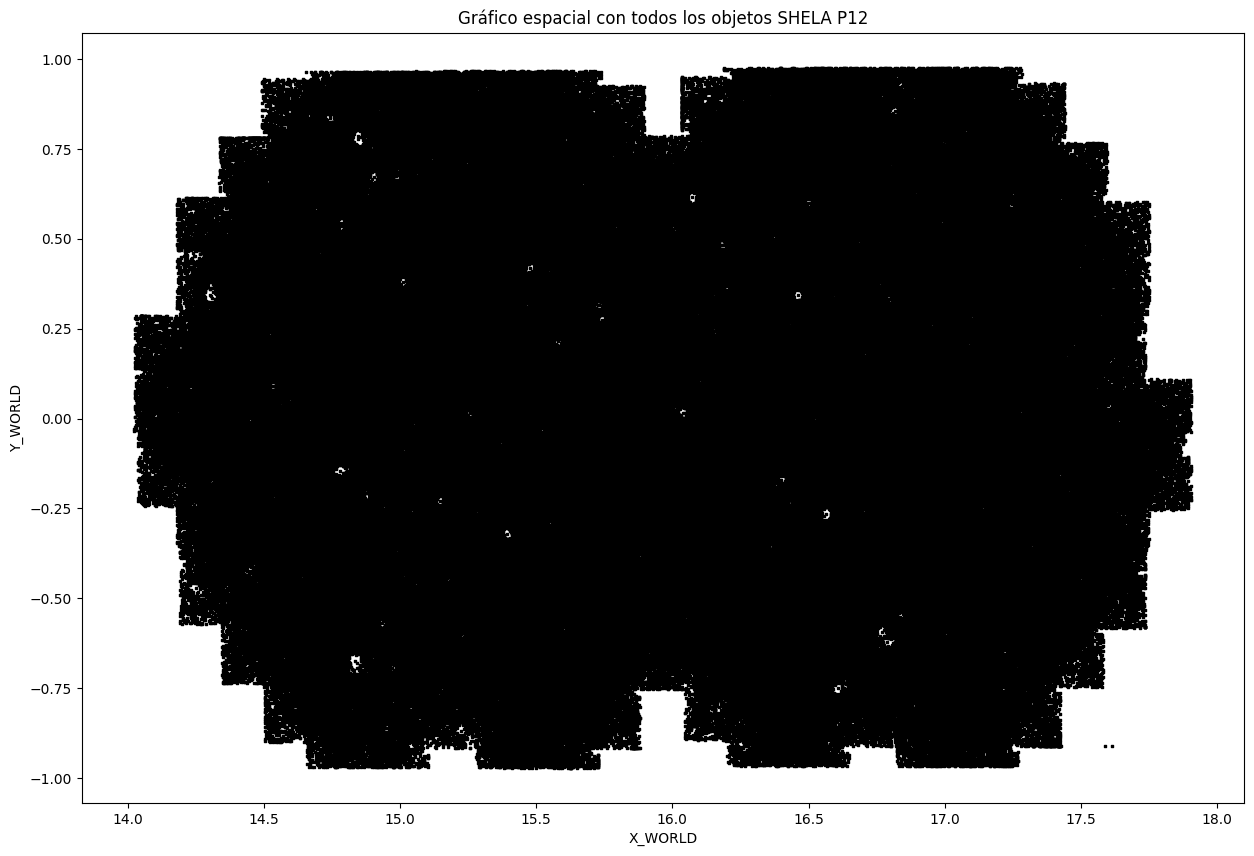

In [13]:
ra = dt['X_WORLD']
dec = dt['Y_WORLD']

plt.figure(figsize=(15, 10))
plt.scatter(ra,dec, marker=',',s = 2, color = 'black')
plt.xlabel('X_WORLD')
plt.ylabel('Y_WORLD')
plt.title('Gráfico espacial con todos los objetos SHELA P12')
plt.show()

In [14]:
#AHORA PASAMOS A MAGNITUD EL FLUJO RG con los valores mayores a 0
import math
def convert_to_magnitude(row):
    mag_gr = -2.5 * np.log10(row['gr_flux'])
    return pd.Series({'gr_mag': mag_gr})

magnitudes = dt.apply(convert_to_magnitude, axis=1)
dt = pd.concat([dt, magnitudes], axis=1)
#dt

In [15]:
dt

,NUMBER,X_WORLD,Y_WORLD,MAG_AUTO_G,MAGERR_AUTO_G,MAG_AUTO_R,MAGERR_AUTO_R,MAG_APER_3,MAGERR_APER_3,FLUX_AUTO_G,...,FLUXERR_AUTO_R,IMAFLAGS_ISO,FLAGS,CLASS_STAR,ELLIPTICITY,KRON_RADIUS,FWHM_WORLD,gr_flux,gr_flux_pos,gr_mag
0,1,15.594019,-0.971049,24.910219,0.061518,24.376667,0.040580,24.843994,0.130524,1.086206e-10,...,6.634664e-12,0,24,0.841401,0.535198,4.345471,0.000498,1.185313e-10,True,24.815417
1,2,15.454047,-0.970744,25.149097,0.074095,24.448353,0.041167,25.244364,0.175401,8.716874e-11,...,6.300487e-12,0,24,0.584171,0.259743,5.504766,0.000301,9.853257e-11,True,25.016050
2,3,15.444664,-0.970722,25.141462,0.064009,24.124405,0.027522,25.220413,0.175062,8.778381e-11,...,5.676584e-12,0,24,0.504379,0.257851,4.723872,0.000328,1.073669e-10,True,24.922824
3,4,15.290254,-0.970367,23.928955,0.091117,23.315063,0.050525,24.319271,0.189159,2.681745e-10,...,2.196113e-11,0,24,0.749033,0.150871,7.180055,0.000409,2.974835e-10,True,23.816343
4,5,14.667002,-0.968978,23.112589,0.046351,22.292429,0.019835,23.751972,0.125198,5.688059e-10,...,2.211170e-11,0,24,0.828268,0.320155,4.912572,0.000444,6.610877e-10,True,22.949352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511300,274862,16.961930,0.651559,23.632271,0.030901,23.236860,0.019541,24.235380,0.063422,3.524450e-10,...,9.127968e-12,0,0,0.215709,0.197803,3.500000,0.000614,3.747069e-10,True,23.565771
511301,274863,16.773845,0.652467,23.152042,0.022164,22.063942,0.007988,24.410492,0.076357,5.485079e-10,...,1.099104e-11,0,0,0.003248,0.357633,3.500000,0.001209,6.844771e-10,True,22.911603
511302,274864,17.341593,0.654685,24.552999,0.075629,24.496786,0.067176,24.895967,0.126730,1.509383e-10,...,9.832571e-12,0,0,0.539582,0.307777,5.399446,0.000685,1.520915e-10,True,24.544738
511303,274865,16.342213,0.655671,24.259661,0.052181,24.236805,0.050526,24.855675,0.111535,1.977586e-10,...,9.396385e-12,0,0,0.372249,0.094799,5.257915,0.000702,1.983635e-10,True,24.256346


In [16]:
dt['gr_err'] = np.sqrt((w501 * dt['MAGERR_AUTO_G'])**2 + ((1 - w501) * dt['MAGERR_AUTO_R'])**2)

In [17]:
# # Calcular el error asociado a rg usando la propagación de errores
# dt['rg_err'] = np.sqrt((w419 * dt['MAGERR_AUTO_R'])**2 + ((1 - w419) * dt['MAGERR_AUTO_G'])**2)

In [18]:
# #condicion 1 con la combinacion rg con corte de color 0.71
# dt['condition1'] = dt.apply(lambda row: row['rg_mag'] - row['MAG_AUTO_N419'] >= 0.71 , axis=1)

# conteo_cond1 = dt['condition1'].value_counts()
# print(conteo_cond1)

# #dt

In [19]:
#condicion 1 con corte de color 0.83
dt['condition1'] = dt.apply(lambda row: row['gr_mag'] - row['MAG_APER_3'] >= 0.83 , axis=1)

conteo_cond1 = dt['condition1'].value_counts()
print(conteo_cond1)

condition1
False    505390
True       4572
Name: count, dtype: int64


In [20]:
#condicion 2 (ab-NB)>= 3 *sigma(ab-NB)
#sigma al cuadrado, si multiplico por 10**-6 tengo magnitud por lo tanto ocupo en la condicion los flujos en magnitudes
dt['sigma_err2'] = (dt['gr_err'])**2 /(dt['gr_mag'])**2 + (dt['MAGERR_APER_3'])**2 / (dt['MAG_APER_3'])**2

#raiz de sigma al cuadrado 
dt['sigma_err'] = np.sqrt(dt['sigma_err2'])

#condicion2
dt['condition2'] = dt.apply(lambda row: (row['gr_mag']) - (row['MAG_APER_3']) >=  (3 * row['sigma_err']), axis=1)
#dt

conteo_cond2 = dt['condition2'].value_counts()
print(conteo_cond2)


condition2
False    481352
True      28610
Name: count, dtype: int64


In [21]:
#condicion5; NB >= 20
dt['condition5'] = dt.apply(lambda row: row['MAG_APER_3'] >= 20, axis =1)


conteo_cond5 = dt['condition5'].value_counts()
print(conteo_cond5)

condition5
True     502560
False      7402
Name: count, dtype: int64


In [22]:
#condicion 6
dt['condition6'] = dt.apply(lambda row: row ['MAG_APER_3'] < 25.7, axis=1)

conteo_cond6 = dt['condition6'].value_counts()
print(conteo_cond6)

condition6
True     504851
False      5111
Name: count, dtype: int64


In [23]:
t501txt= ascii.read('N501_simulated_transmission_f3.6.txt')

t501 = t501txt.to_pandas()

# t419

In [24]:
#cargamos la data de las broadbans g,r,i,z,Y:

BBtxt = ascii.read('broadbands.txt')

#conversion de la "tabla" a un DataFrame de Pandas para poder utilizar función apply
BB = BBtxt.to_pandas()

#LAMBDA estaba en angstrom y los filtros son adiminesionales 
BB['wave'] = BB['LAMBDA']*(0.1)

BB['gr'] = BB.apply(lambda row: w501 * row['g'] + (1 - w501) * row['r'], axis=1)  # Transmisión

# BB['rg'] = BB.apply(lambda row: w419 * row['r'] + (1 - w419) * row['g'], axis=1)  # Transmisión

BB

,LAMBDA,g,r,i,z,Y,atm,wave,gr
0,3800.0,0.00000,0.0,0.0,0.0,0.0,0.60928,380.0,0.000000
1,3805.0,0.00024,0.0,0.0,0.0,0.0,0.61078,380.5,0.000205
2,3810.0,0.00048,0.0,0.0,0.0,0.0,0.61227,381.0,0.000411
3,3815.0,0.00054,0.0,0.0,0.0,0.0,0.61371,381.5,0.000462
4,3820.0,0.00060,0.0,0.0,0.0,0.0,0.61520,382.0,0.000514
...,...,...,...,...,...,...,...,...,...
1436,10980.0,0.00000,0.0,0.0,0.0,0.0,0.93711,1098.0,0.000000
1437,10985.0,0.00000,0.0,0.0,0.0,0.0,0.93588,1098.5,0.000000
1438,10990.0,0.00000,0.0,0.0,0.0,0.0,0.92860,1099.0,0.000000
1439,10995.0,0.00000,0.0,0.0,0.0,0.0,0.92189,1099.5,0.000000


In [25]:
import scipy.integrate as integrate
from scipy.integrate import quad

In [26]:
def integrand(x, c, T_BB):
    return (c * T_BB) / (x**2)

a, b = 490, 515
c = 3 * 10**17
integrals_quad = []
errors_quad = []

for index, row in BB.iterrows():
    integral, error = quad(integrand, a, b, args=(c, row['gr']))
    integrals_quad.append(integral)
    errors_quad.append(error)
    
BB['area'] = integrals_quad
BB['error'] = errors_quad
area_gr = BB['area'].sum()
total_error_gr = np.sqrt(np.sum(np.array(errors_quad)**2))
print("El área total bajo la curva es:", area_gr)
print("El error total estimado es:", total_error_gr)


El área total bajo la curva es: 4904120898976620.0
El error total estimado es: 2.6301457714125798


In [27]:
wave = t501['Wavelength[nm]']
T = t501['Transmission']

def integrand(x, c, T):
    return (c * T) / (x**2)

a, b = 490, 515
c = 3 * 10**17
integrals_quad = []
errors_quad = []

for index, row in t501.iterrows():
    integral, error = quad(integrand, a, b, args=(c, row['Transmission']))
    integrals_quad.append(integral)
    errors_quad.append(error)
    
t501['area'] = integrals_quad
t501['error'] = errors_quad
area_n501 = t501['area'].sum()
total_error_n501 = np.sqrt(np.sum(np.array(errors_quad)**2))
print("El área total bajo la curva es:", area_n501)
print("El error total estimado es:", total_error_n501)

El área total bajo la curva es: 1122410612888844.8
El error total estimado es: 1.8658204134060876


In [28]:
C = area_n501 / area_gr
C

np.float64(0.2288709099979706)

In [29]:
#condición 3
dt['condition3'] = dt.apply(lambda row: (row['gr_mag']) - (row['MAG_APER_3']) < -2.5* np.log10(C) + (2 * row['sigma_err']), axis=1)

conteo_cond3 = dt['condition3'].value_counts()
print(conteo_cond3)

#dt

condition3
True     508570
False      1392
Name: count, dtype: int64


In [30]:
# filtrar los datos que cumplen todas las condiciones
dt1 = dt.loc[dt['condition1'] & dt['condition2'] & dt['condition3'] & dt['condition5'] & dt['condition6']]
dt1

,NUMBER,X_WORLD,Y_WORLD,MAG_AUTO_G,MAGERR_AUTO_G,MAG_AUTO_R,MAGERR_AUTO_R,MAG_APER_3,MAGERR_APER_3,FLUX_AUTO_G,...,gr_flux_pos,gr_mag,gr_err,condition1,sigma_err2,sigma_err,condition2,condition5,condition6,condition3
18,19,15.329219,-0.970035,26.172585,0.438523,24.529312,0.092641,24.667788,0.198159,3.395983e-11,...,True,25.725628,0.375713,True,0.000278,0.016668,True,True,True,True
173,174,15.726049,-0.967770,26.098137,0.058316,99.000000,99.000000,24.963335,0.025363,3.637013e-11,...,True,26.634964,14.233317,True,0.285568,0.534386,True,True,True,True
506,507,15.483413,-0.958453,26.369482,0.126668,25.989077,0.100596,25.184406,0.182734,2.832743e-11,...,True,26.305886,0.109417,True,0.000070,0.008364,True,True,True,True
561,562,15.461693,-0.957143,26.506037,0.143135,25.664885,0.073103,25.450733,0.232179,2.497957e-11,...,True,26.337234,0.123007,True,0.000105,0.010249,True,True,True,True
806,807,15.037830,-0.950741,26.062977,0.123633,25.389549,0.065590,24.847420,0.214105,3.756720e-11,...,True,25.936492,0.106278,True,0.000091,0.009541,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510538,273998,16.301310,0.664319,26.763908,0.431466,25.586311,0.139101,25.362383,0.177241,1.969864e-11,...,True,26.494578,0.369975,True,0.000244,0.015615,True,True,True,True
510587,274054,16.310441,0.662386,26.575068,0.143907,26.419954,0.120885,25.660028,0.237194,2.344082e-11,...,True,26.551357,0.124437,True,0.000107,0.010364,True,True,True,True
510597,274064,16.293985,0.684358,26.805670,0.169404,26.820835,0.165088,25.601898,0.219618,1.895534e-11,...,True,26.807839,0.146977,True,0.000104,0.010181,True,True,True,True
511030,274559,16.150447,0.659127,26.541319,0.119817,25.551067,0.046740,25.437780,0.201733,2.418088e-11,...,True,26.330651,0.102811,True,0.000078,0.008840,True,True,True,True


## OBTENEMOS 1960 objetos filtrados de 511305 con las condiciones dt1

In [31]:
#Aca faltaba agregar la sección 2.6 Data Quality Cuts
#ITEM 1 Fv distinto de zero
dt['conditionm1'] =  dt.apply(lambda row: row['FLUX_AUTO_G'] != 0, axis=1)
dt['conditionm2'] =  dt.apply(lambda row: row['FLUX_AUTO_R'] != 0, axis=1)
dt['conditionm3'] =  dt.apply(lambda row: row['MAGERR_APER_3'] != 0, axis=1)
conteo_condm1 = dt['conditionm1'].value_counts()
print(conteo_condm1)
conteo_condm2 = dt['conditionm2'].value_counts()
print(conteo_condm2)
conteo_condm3 = dt['conditionm3'].value_counts()
print(conteo_condm3)
#ITEM 2 S/N (N501) >5.
dt['conditionm4'] =  dt.apply(lambda row: (1.0869/row['MAGERR_APER_3'] ) >= 5., axis=1)
conteo_condm4 = dt['conditionm4'].value_counts()
print(conteo_condm4)

##ITEM 3 IMAFLAGS ISO = 0
dt['conditionm5'] =  dt.apply(lambda row: row['IMAFLAGS_ISO'] == 0.0, axis=1)
conteo_condm5 = dt['conditionm5'].value_counts()
print(conteo_condm5)

##ITEM 4 FLAGS < 4
dt['conditionm6'] =   dt.apply(lambda row: row['FLAGS'] < 4.0, axis=1)
conteo_condm6 = dt['conditionm6'].value_counts()
print(conteo_condm6)

#gr - n501
color_gr_n501 = dt.apply(lambda row: (row['gr_mag']) - (row['MAG_APER_3']), axis=1)
dt['color_gr_n501'] = color_gr_n501

dt

conditionm1
True    509962
Name: count, dtype: int64
conditionm2
True    509962
Name: count, dtype: int64
conditionm3
True    509962
Name: count, dtype: int64
conditionm4
True     497433
False     12529
Name: count, dtype: int64
conditionm5
True     508902
False      1060
Name: count, dtype: int64
conditionm6
True     508299
False      1663
Name: count, dtype: int64


,NUMBER,X_WORLD,Y_WORLD,MAG_AUTO_G,MAGERR_AUTO_G,MAG_AUTO_R,MAGERR_AUTO_R,MAG_APER_3,MAGERR_APER_3,FLUX_AUTO_G,...,condition5,condition6,condition3,conditionm1,conditionm2,conditionm3,conditionm4,conditionm5,conditionm6,color_gr_n501
0,1,15.594019,-0.971049,24.910219,0.061518,24.376667,0.040580,24.843994,0.130524,1.086206e-10,...,True,True,True,True,True,True,True,True,False,-0.028577
1,2,15.454047,-0.970744,25.149097,0.074095,24.448353,0.041167,25.244364,0.175401,8.716874e-11,...,True,True,True,True,True,True,True,True,False,-0.228313
2,3,15.444664,-0.970722,25.141462,0.064009,24.124405,0.027522,25.220413,0.175062,8.778381e-11,...,True,True,True,True,True,True,True,True,False,-0.297589
3,4,15.290254,-0.970367,23.928955,0.091117,23.315063,0.050525,24.319271,0.189159,2.681745e-10,...,True,True,True,True,True,True,True,True,False,-0.502928
4,5,14.667002,-0.968978,23.112589,0.046351,22.292429,0.019835,23.751972,0.125198,5.688059e-10,...,True,True,True,True,True,True,True,True,False,-0.802620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511300,274862,16.961930,0.651559,23.632271,0.030901,23.236860,0.019541,24.235380,0.063422,3.524450e-10,...,True,True,True,True,True,True,True,True,True,-0.669609
511301,274863,16.773845,0.652467,23.152042,0.022164,22.063942,0.007988,24.410492,0.076357,5.485079e-10,...,True,True,True,True,True,True,True,True,True,-1.498889
511302,274864,17.341593,0.654685,24.552999,0.075629,24.496786,0.067176,24.895967,0.126730,1.509383e-10,...,True,True,True,True,True,True,True,True,True,-0.351229
511303,274865,16.342213,0.655671,24.259661,0.052181,24.236805,0.050526,24.855675,0.111535,1.977586e-10,...,True,True,True,True,True,True,True,True,True,-0.599329


In [32]:
# filtrar los datos que cumplen todas las condiciones
dt2 = dt.loc[dt['condition1'] & dt['condition2'] & dt['condition3'] & dt['condition5'] & dt['condition6']& dt['conditionm1'] & dt['conditionm2'] & dt['conditionm3'] & dt['conditionm5'] & dt['conditionm6'] & dt['color_gr_n501']]
dt2

,NUMBER,X_WORLD,Y_WORLD,MAG_AUTO_G,MAGERR_AUTO_G,MAG_AUTO_R,MAGERR_AUTO_R,MAG_APER_3,MAGERR_APER_3,FLUX_AUTO_G,...,condition5,condition6,condition3,conditionm1,conditionm2,conditionm3,conditionm4,conditionm5,conditionm6,color_gr_n501
506,507,15.483413,-0.958453,26.369482,0.126668,25.989077,0.100596,25.184406,0.182734,2.832743e-11,...,True,True,True,True,True,True,True,True,True,1.121480
561,562,15.461693,-0.957143,26.506037,0.143135,25.664885,0.073103,25.450733,0.232179,2.497957e-11,...,True,True,True,True,True,True,False,True,True,0.886501
806,807,15.037830,-0.950741,26.062977,0.123633,25.389549,0.065590,24.847420,0.214105,3.756720e-11,...,True,True,True,True,True,True,True,True,True,1.089073
986,987,15.578105,-0.949436,24.165518,0.076055,24.041622,0.076349,22.884295,0.024469,2.156712e-10,...,True,True,True,True,True,True,True,True,True,1.262518
1223,1224,15.531935,-0.942339,26.157936,0.312131,25.242046,0.150640,25.005260,0.150661,3.442114e-11,...,True,True,True,True,True,True,True,True,True,0.963404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510538,273998,16.301310,0.664319,26.763908,0.431466,25.586311,0.139101,25.362383,0.177241,1.969864e-11,...,True,True,True,True,True,True,True,True,True,1.132195
510587,274054,16.310441,0.662386,26.575068,0.143907,26.419954,0.120885,25.660028,0.237194,2.344082e-11,...,True,True,True,True,True,True,False,True,True,0.891328
510597,274064,16.293985,0.684358,26.805670,0.169404,26.820835,0.165088,25.601898,0.219618,1.895534e-11,...,True,True,True,True,True,True,False,True,True,1.205940
511030,274559,16.150447,0.659127,26.541319,0.119817,25.551067,0.046740,25.437780,0.201733,2.418088e-11,...,True,True,True,True,True,True,True,True,True,0.892871


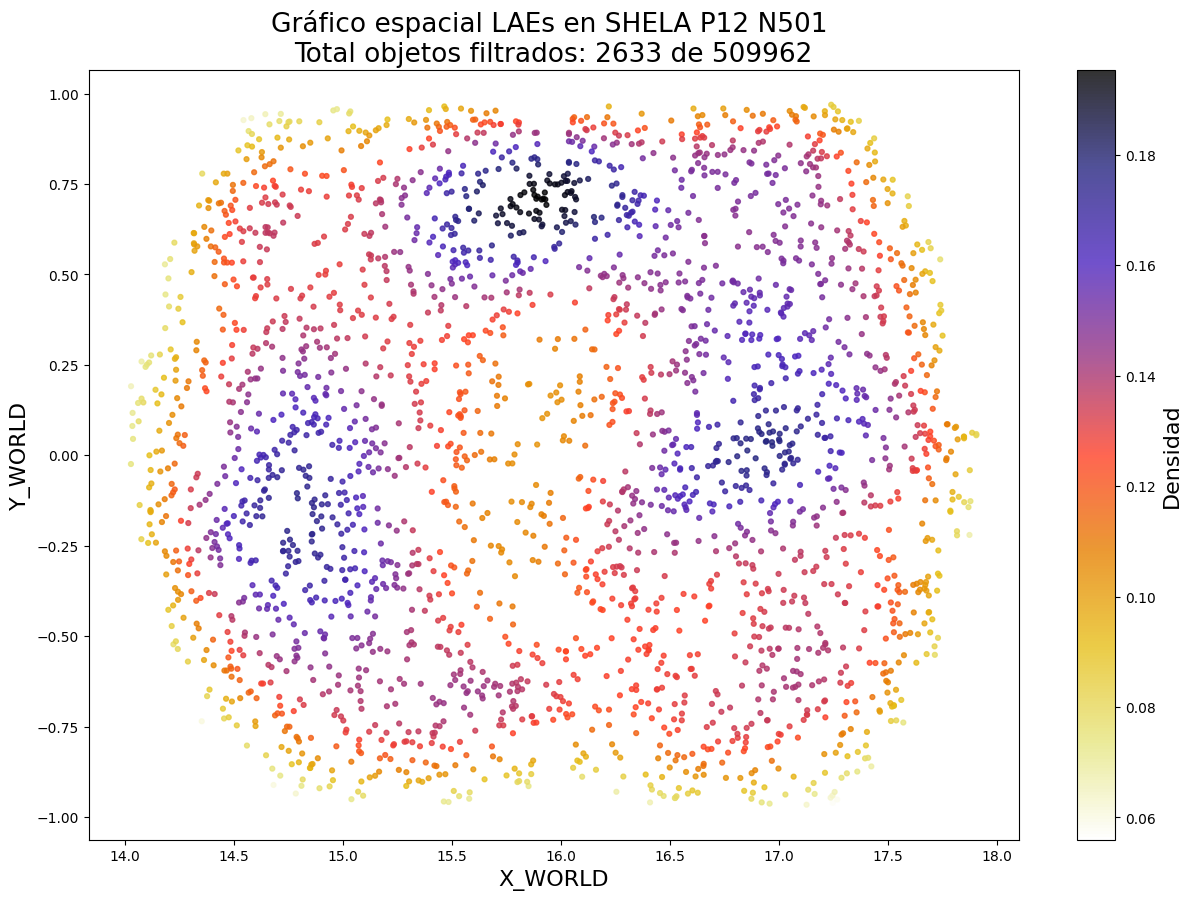

In [33]:
import seaborn as sns
from scipy.stats import gaussian_kde

#cmap = 'twilight_shifted', magma, viridis, plasma
# Crear un gráfico de dispersión con color según el flujo en magnitudes
# Calcular la densidad local de los puntos usando KDE
x = dt2['X_WORLD']
y = dt2['Y_WORLD']
xy = np.vstack([x, y])  # Crear una matriz con las coordenadas (x, y)
z = gaussian_kde(xy)(xy)  # Calcular la densidad para cada punto
num_objects = len(x)

plt.figure(figsize=(15, 10))
scatter = plt.scatter(x,y, c=z, s=12, marker = 'o', cmap='CMRmap_r', alpha=0.8, edgecolor = 'face')
cbar = plt.colorbar(scatter,label='Densidad LAEs')
cbar.set_label('Densidad', fontsize=16)
plt.xlabel('X_WORLD', fontsize = 16)
plt.ylabel('Y_WORLD', fontsize = 16)
plt.title(f'Gráfico espacial LAEs en SHELA P12 N501 \nTotal objetos filtrados: {num_objects} de 509962', fontsize = 19)
plt.grid(False)
#plt.xlim(16.3,17.3)
#plt.ylim(-0.50,0.23)
plt.savefig('Gespacial N501 P12 (dt2)')
plt.show()

In [34]:
import seaborn as sns
#cmap = 'twilight_shifted', magma, viridis, plasma
# Crear un gráfico de dispersión con color según el flujo en magnitudes
# plt.figure(figsize=(15, 10))
# scatter = plt.scatter(dt['X_WORLD'], dt['Y_WORLD'], c=dt['gr_mag'], s=15, marker = 'o', cmap='CMRmap_r', alpha=0.8)
# plt.colorbar(scatter, label='gr (mag)')
# plt.xlabel('Ascensión Recta (RA)')
# plt.ylabel('Declinación (DEC)')
# plt.title('Gráfico Espacial galaxias SHELA P12 N501 ')
# plt.grid(True)

#plt.show()

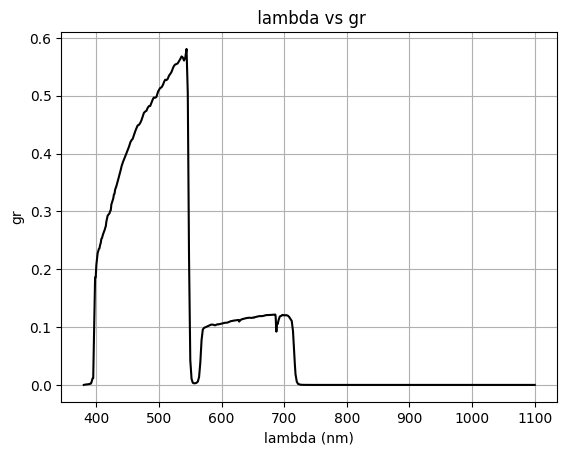

In [35]:
x = BB['wave']
y = BB['gr']

plt.plot(x,y , color = 'black')

# Etiquetas de los ejes y título
plt.xlabel('lambda (nm)')
plt.ylabel('gr')
plt.title(' lambda vs gr')


plt.grid(True)
plt.show()

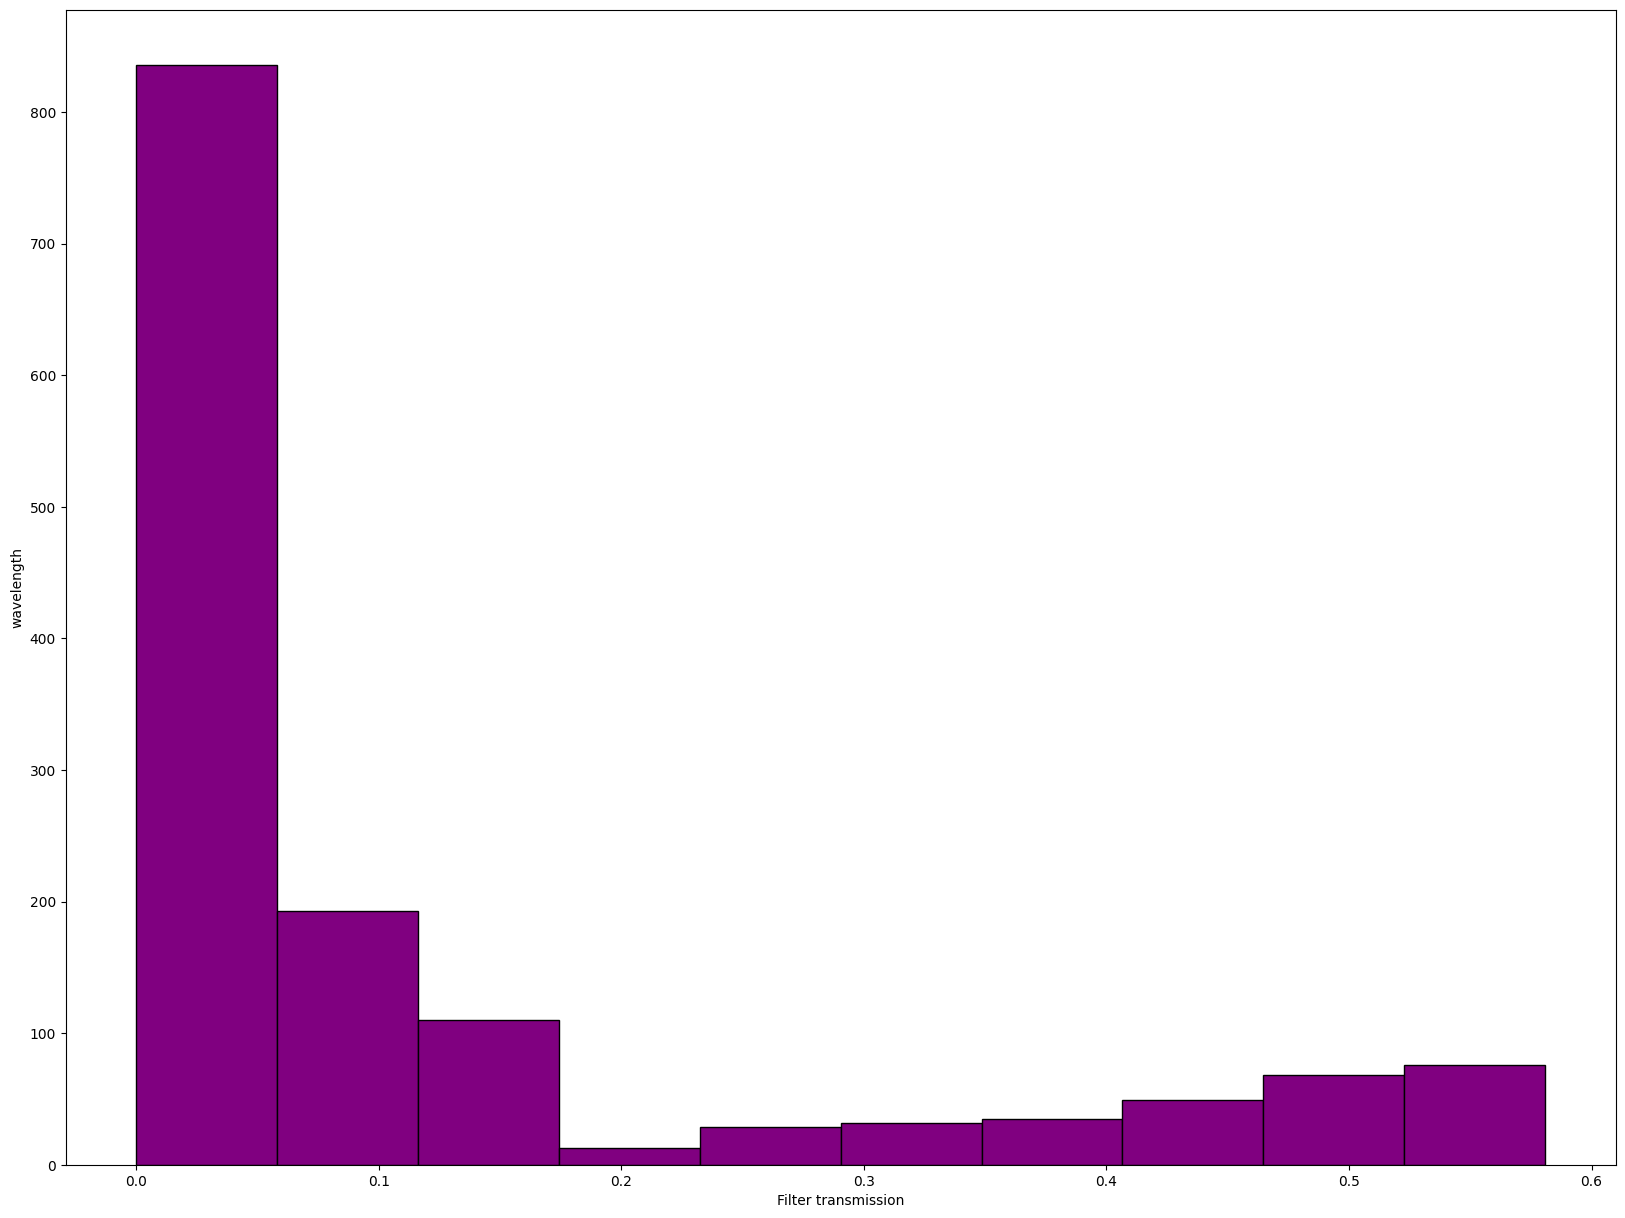

In [36]:
#Histograma
plt.figure(figsize=(20, 15))
BB['gr'].hist(bins=10, color='purple', edgecolor = 'black')

plt.xlabel('Filter transmission')
plt.ylabel('wavelength')
plt.title('')
plt.grid(False)
plt.show()

In [37]:
import astropy.stats as stats
from astropy.stats import histogram 

Text(0.5, 1.0, 'Histograma de elipticidad')

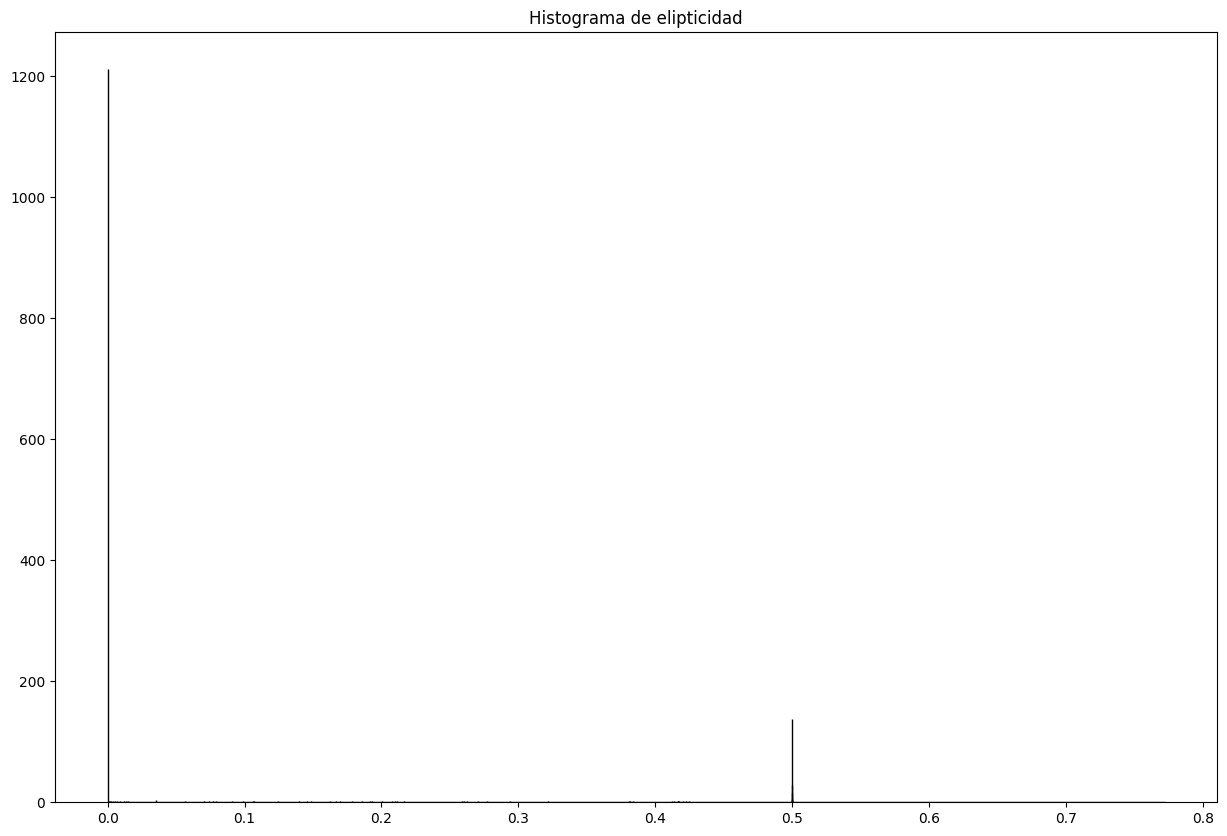

In [38]:
# utilizar método knuth o blocks
ellipsis = dt2['ELLIPTICITY']

plt.figure(figsize=(15,10))
bins, bin_edges = histogram(ellipsis, bins='knuth')

# Crear el gráfico del histograma
plt.hist(ellipsis, bins=bin_edges, color='orange', edgecolor='black')
plt.title('Histograma de elipticidad')
#plt.xlim(-0.01,0.5)

Text(0.5, 1.0, 'Histograma de class star')

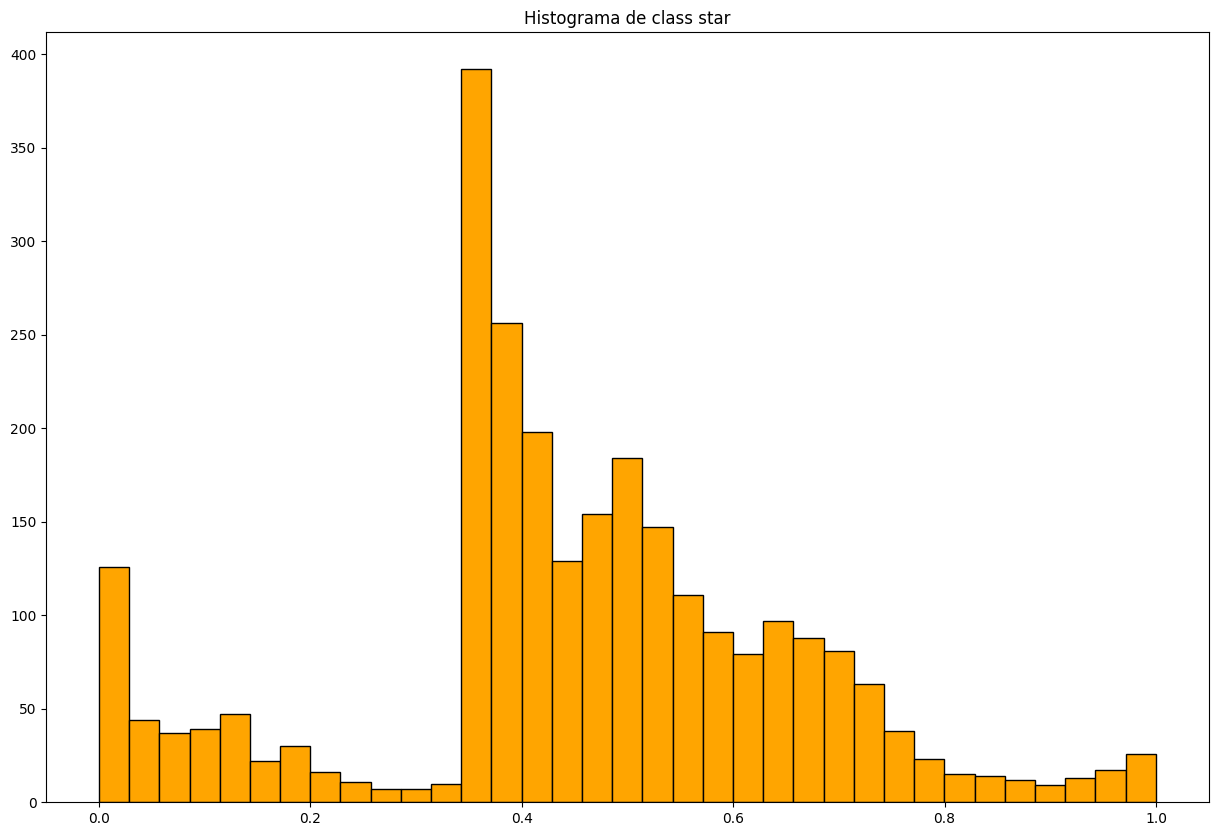

In [39]:
# utilizar método knuth o blocks
classtar = dt2['CLASS_STAR']

plt.figure(figsize=(15,10))
bins, bin_edges = histogram(classtar, bins='knuth')

# Crear el gráfico del histograma
plt.hist(classtar, bins=bin_edges, color='orange', edgecolor='black')
plt.title('Histograma de class star')

(1.5, 11.0)

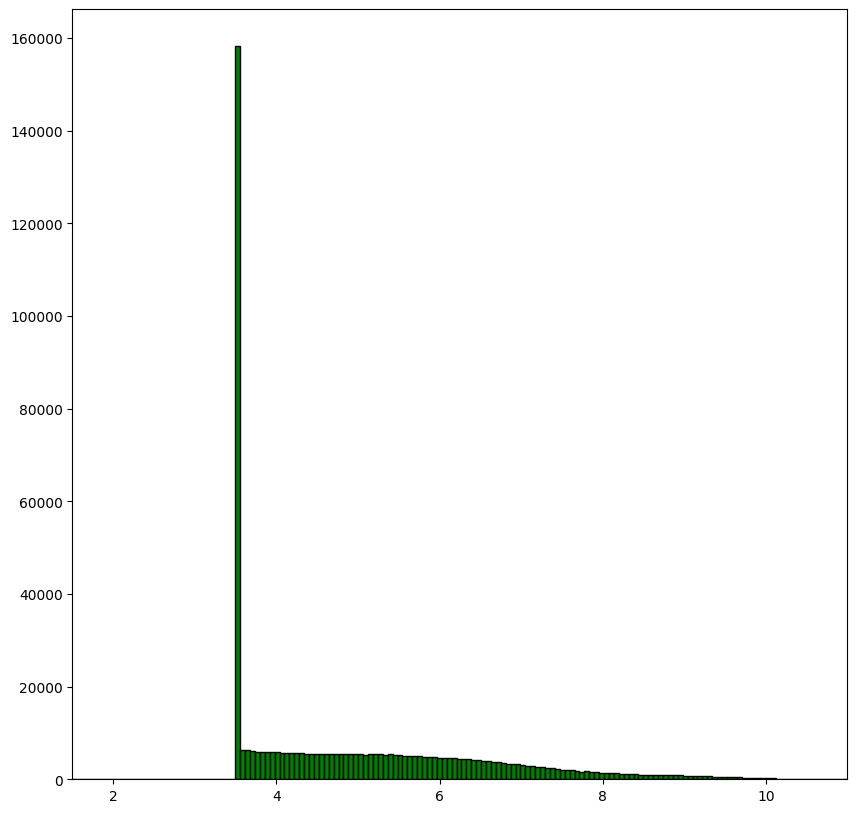

In [40]:
# utilizar método knuth o blocks
radio = dt['KRON_RADIUS']

plt.figure(figsize=(10, 10))
bins, bin_edges = histogram(radio, bins='knuth')

# Crear el gráfico del histograma
plt.hist(radio, bins=bin_edges, color='green', edgecolor='black')
plt.xlim(1.5,11)

Text(0.5, 1.0, 'Histograma de magnitud N501')

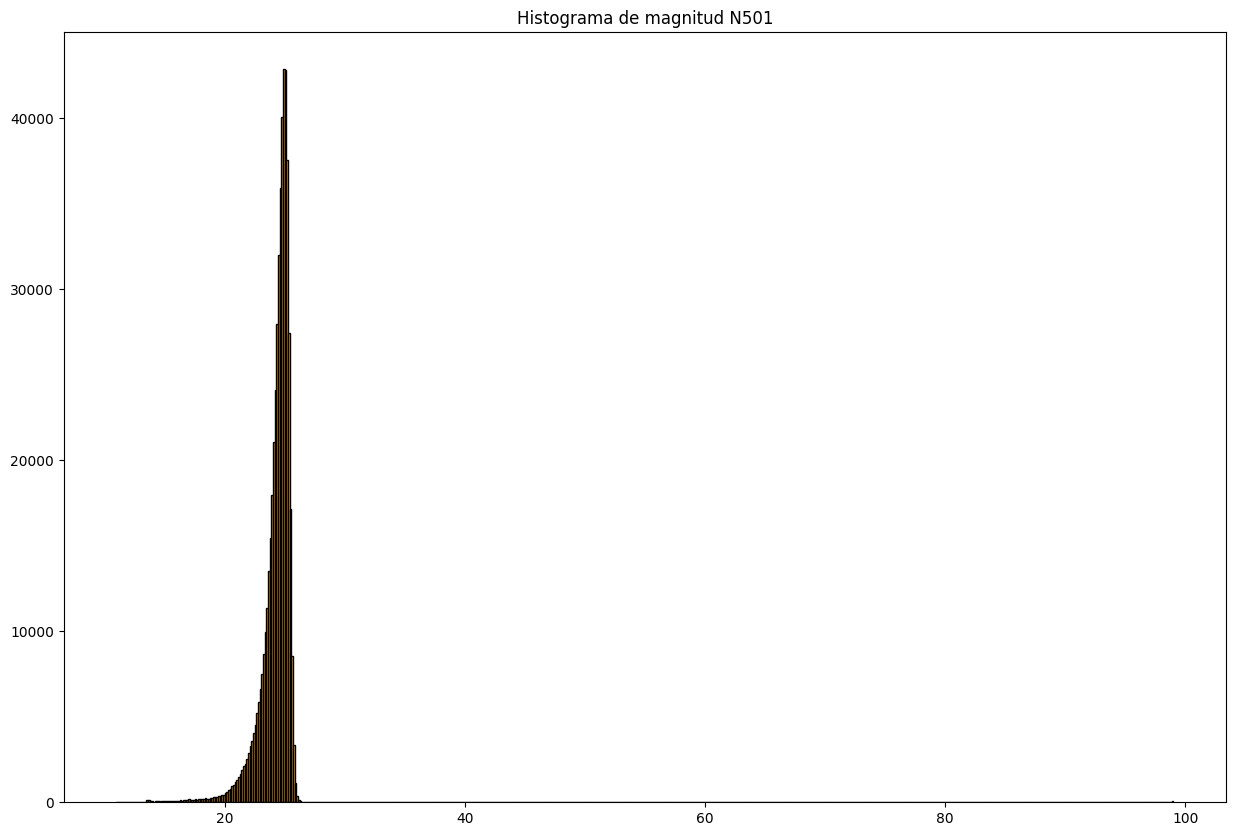

In [41]:
# utilizar método knuth o blocks
mag_n501 = dt['MAG_APER_3']

plt.figure(figsize=(15, 10))
bins, bin_edges = histogram(mag_n501, bins='knuth')

# Crear el gráfico del histograma
plt.hist(mag_n501, bins=bin_edges, color='orange', edgecolor='black')
plt.title('Histograma de magnitud N501')

Text(0.5, 1.0, 'Histograma error N501 magnitud')

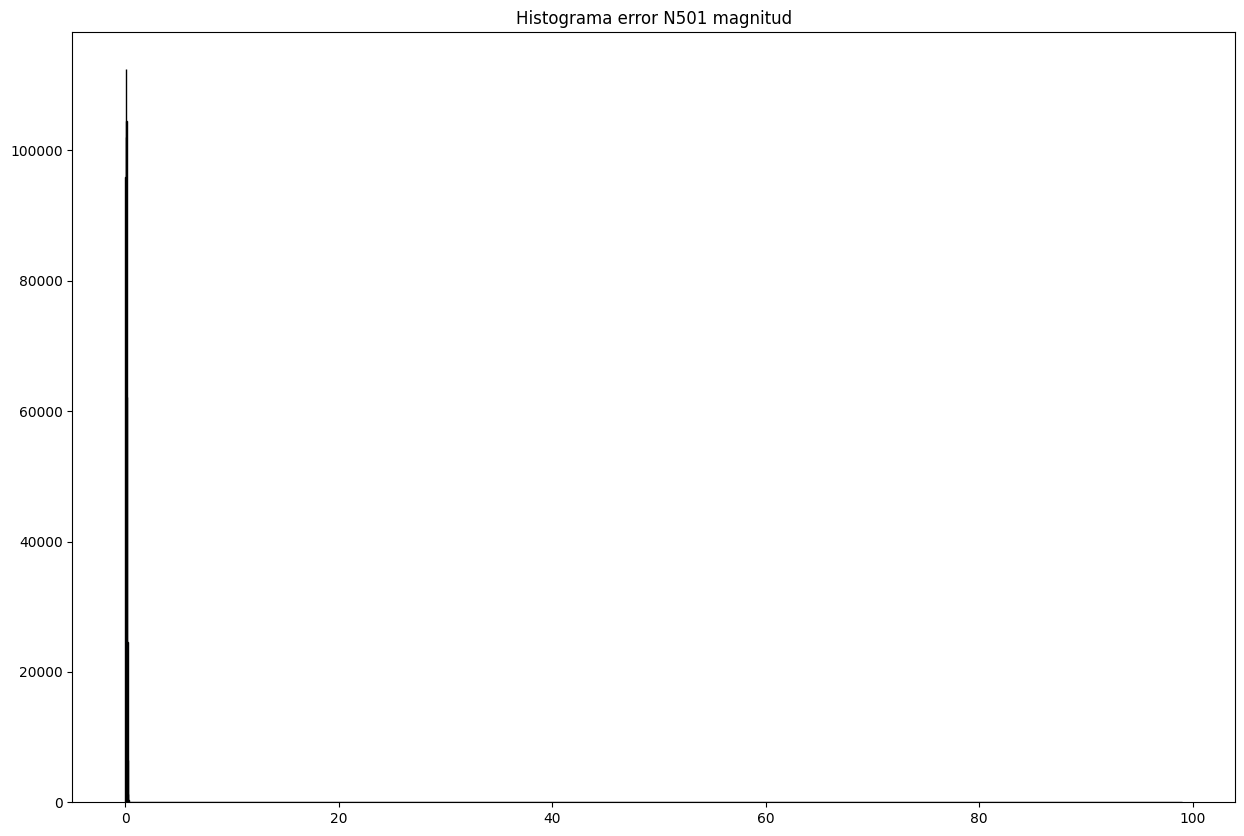

In [42]:
# utilizar método knuth o blocks
mag_n501_err = dt['MAGERR_APER_3']
plt.figure(figsize=(15, 10))
bins, bin_edges = histogram(mag_n501_err, bins='knuth')

# Crear el gráfico del histograma
plt.hist(mag_n501_err, bins=bin_edges, color='orange', edgecolor='black')
plt.title('Histograma error N501 magnitud')

Text(0.5, 1.0, 'Histograma gr magnitud')

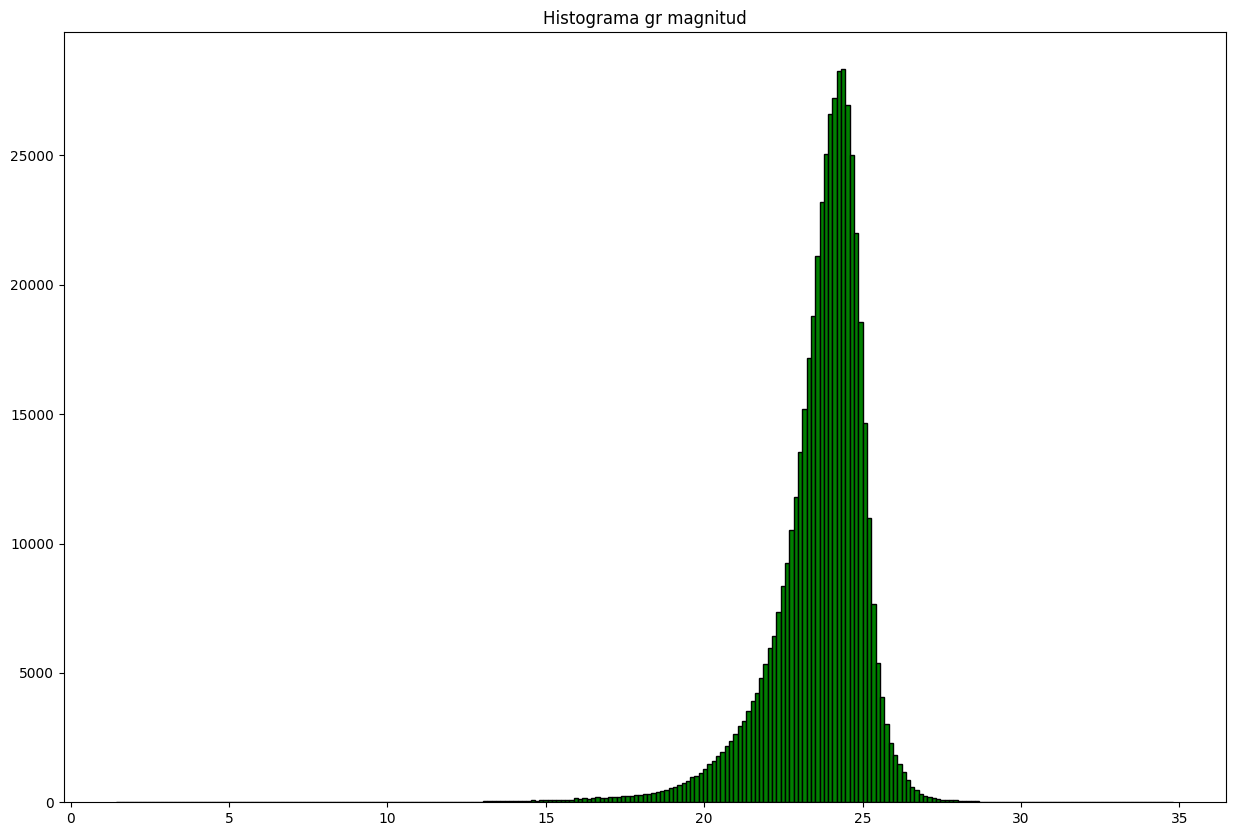

In [43]:
# utilizar método knuth o blocks
mag_gr = dt['gr_mag']

plt.figure(figsize=(15, 10))
bins, bin_edges = histogram(mag_gr, bins='knuth')

# Crear el gráfico del histograma
plt.hist(mag_gr, bins=bin_edges, color='green', edgecolor='black')
plt.title('Histograma gr magnitud')

(-1.0, 10.0)

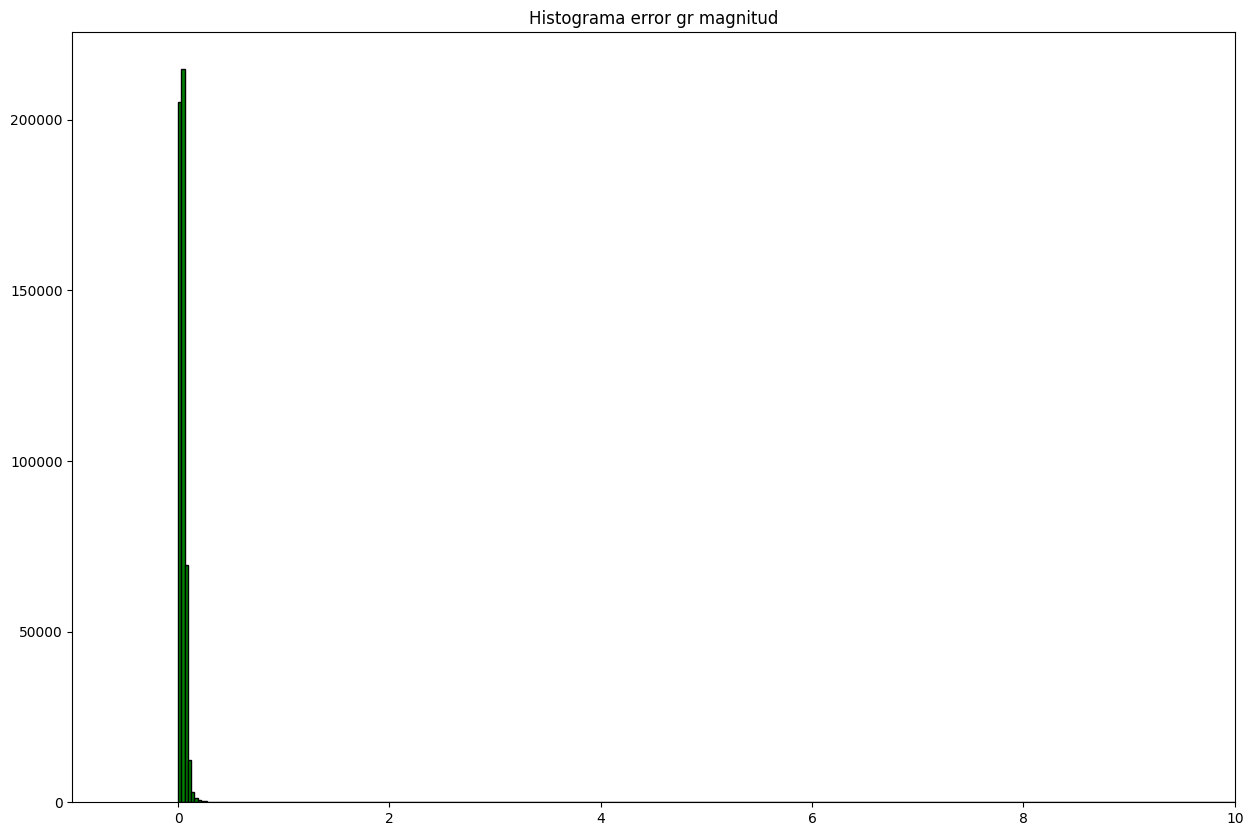

In [58]:
# utilizar método knuth o blocks
mag_gr_err = dt['gr_err']
plt.figure(figsize=(15,10))
bins, bin_edges = histogram(mag_gr_err, bins='knuth')

# Crear el gráfico del histograma
plt.hist(mag_gr_err, bins=bin_edges, color='green', edgecolor='black')
plt.title('Histograma error gr magnitud')
plt.xlim(-1,10)

Text(0.5, 1.0, 'Histograma magnitud G ')

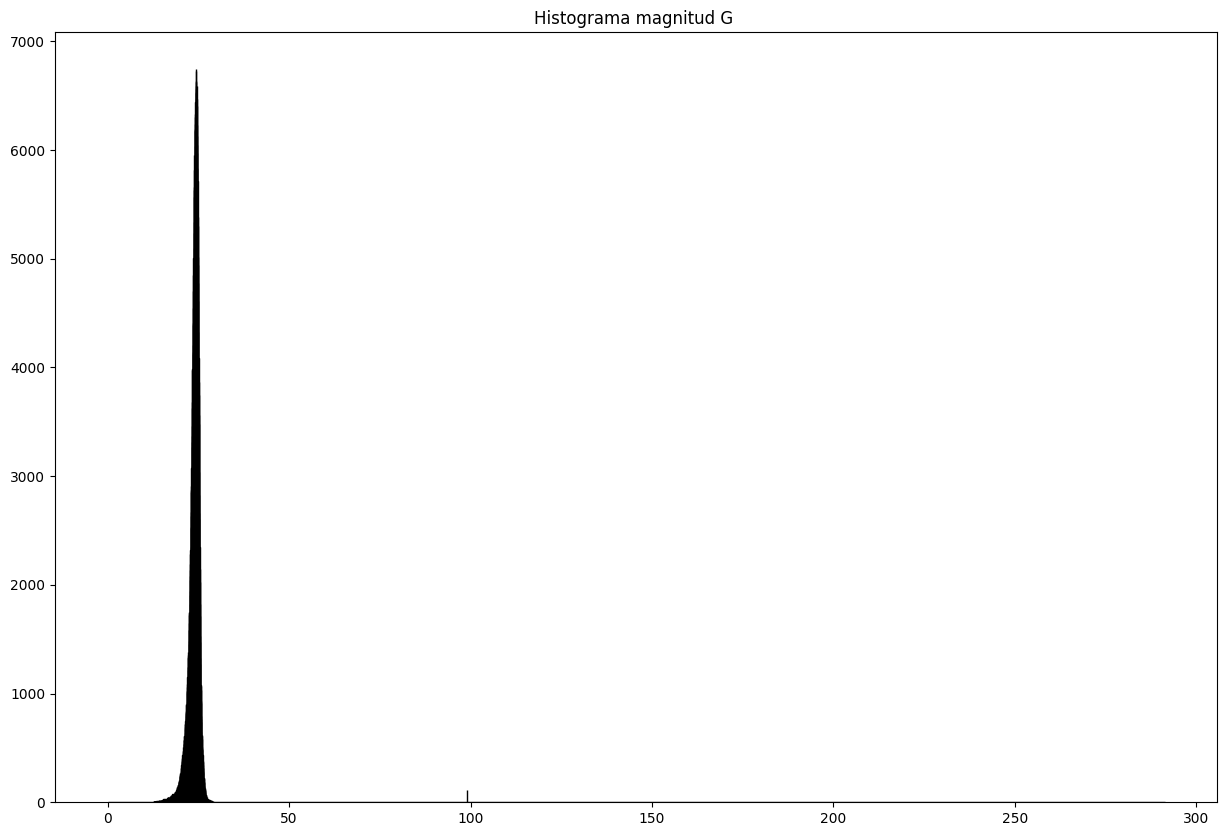

In [45]:
# utilizar método knuth o blocks
mag_g = dt['MAG_AUTO_G']
mag_g_err =dt['MAGERR_AUTO_G']
mag_r = dt['MAG_AUTO_R']
mag_r_err = dt['MAGERR_AUTO_R']

bins, bin_edges = histogram(mag_gr_err, bins='knuth')

plt.figure(figsize=(15,10))
# Crear el gráfico del histograma
plt.hist(mag_g, bins=bin_edges, color='green', edgecolor='black')
plt.title('Histograma magnitud G ')

Text(0.5, 1.0, 'Histograma de error magnitud G')

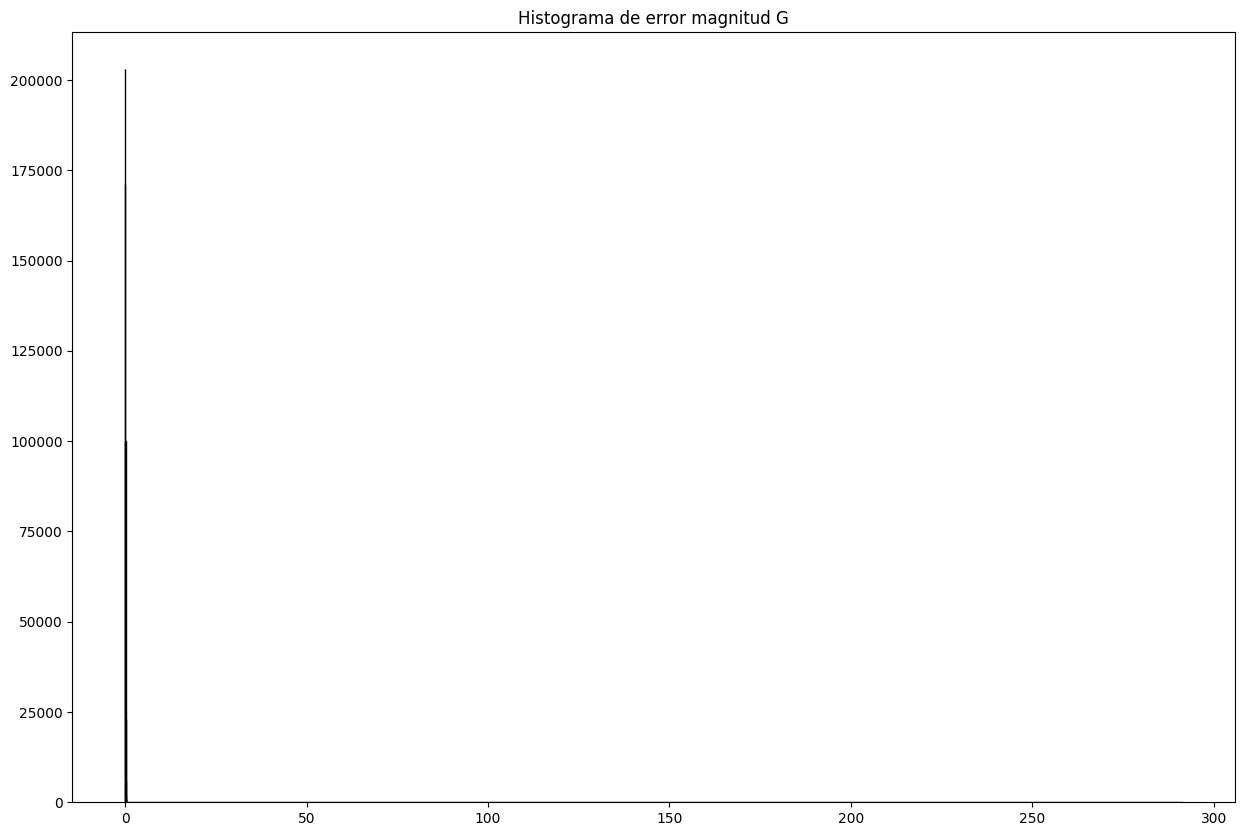

In [46]:
plt.figure(figsize=(15,10))
plt.hist(mag_g_err, bins=bin_edges, color='green', edgecolor='black')
plt.title('Histograma de error magnitud G')

(15.0, 100.0)

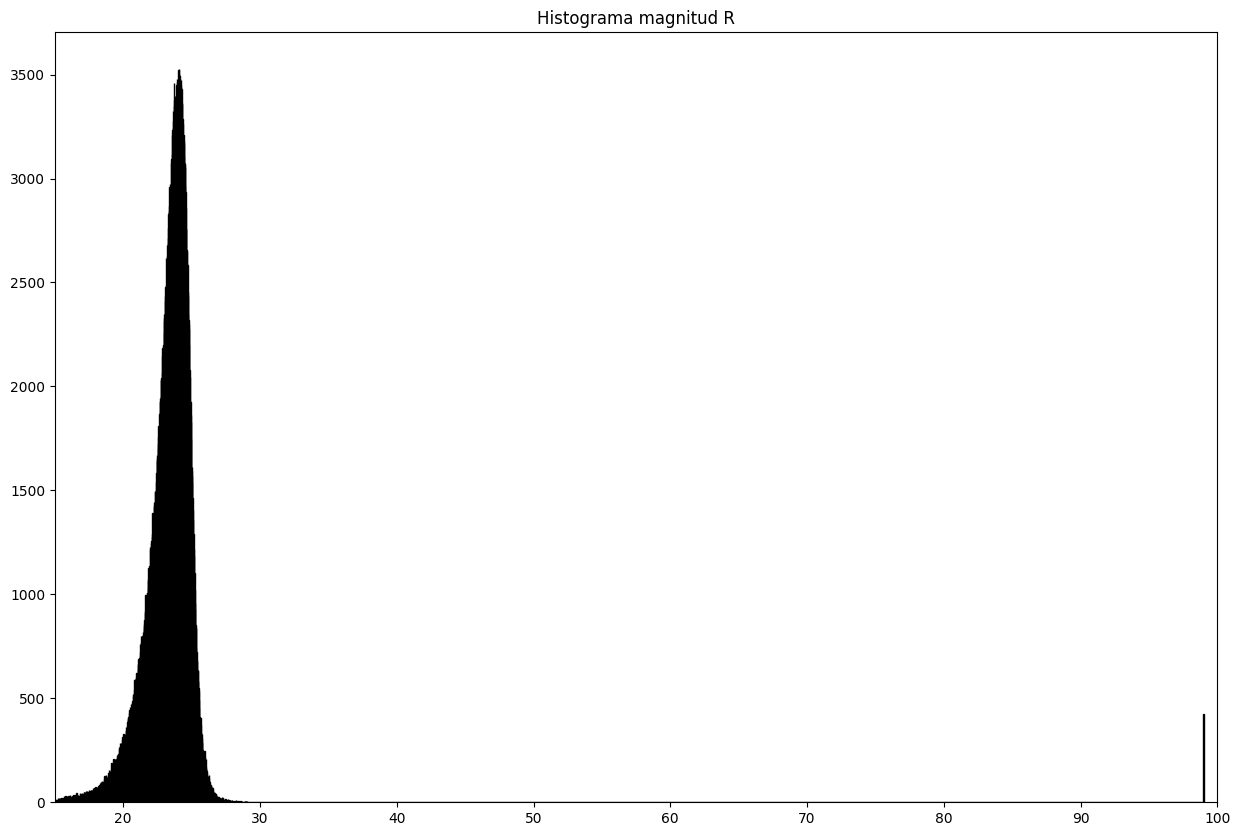

In [78]:
plt.figure(figsize=(15,10))
plt.hist(mag_r, bins=5000, color='blue', edgecolor='black')
plt.title('Histograma magnitud R')
plt.xlim(15,100)

(15.0, 100.0)

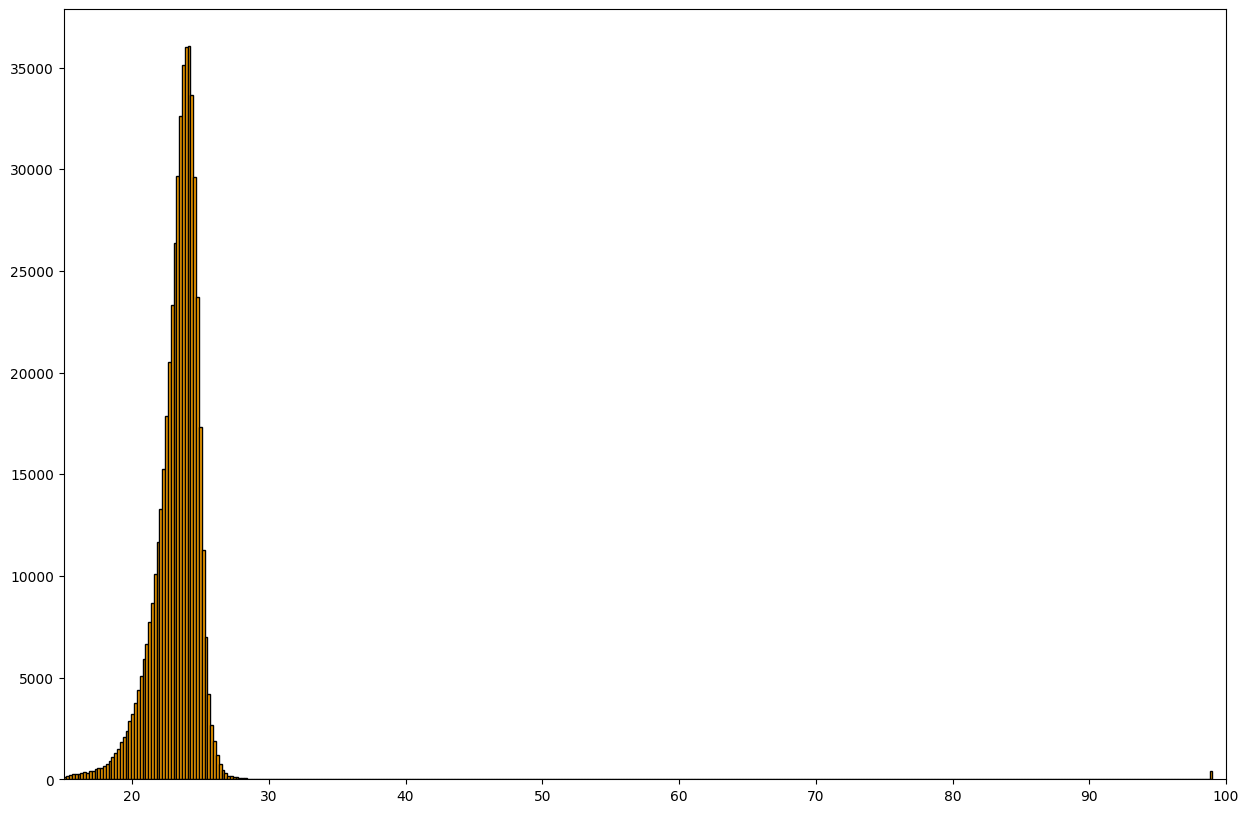

In [79]:
mag_r = dt['MAG_AUTO_R']

plt.figure(figsize=(15, 10))
bins, bin_edges = histogram(mag_r, bins='knuth')

# Crear el gráfico del histograma
plt.hist(mag_r, bins=bin_edges, color='orange', edgecolor='black')
plt.xlim(15,100)

Text(0.5, 1.0, 'Histograma de error magnitud R')

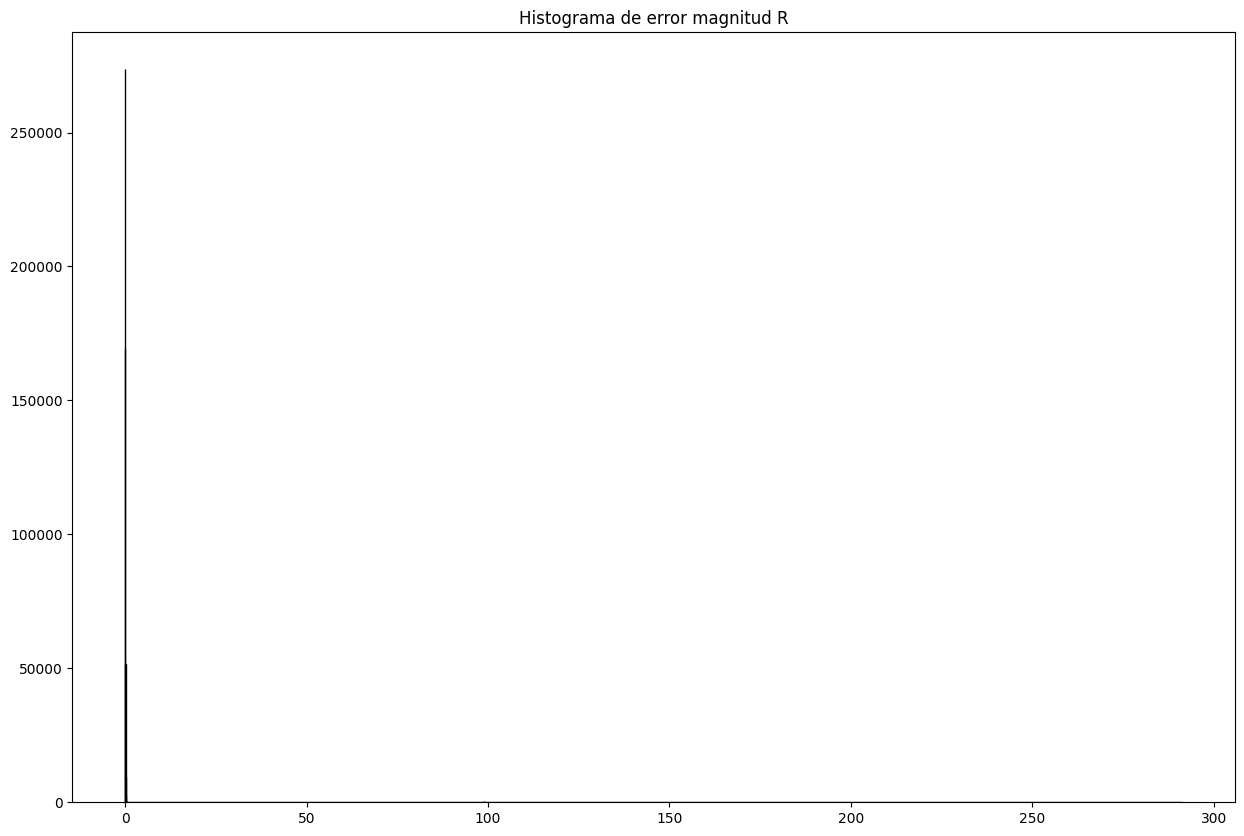

In [59]:
plt.figure(figsize=(15,10))
plt.hist(mag_r_err, bins=bin_edges, color='blue', edgecolor='black')
plt.title('Histograma de error magnitud R')
# plt.xlim(-0.1,2)

In [49]:
import seaborn as sns
from scipy.stats import gaussian_kde
#cmap = 'twilight_shifted', magma, viridis, plasma
# Crear un gráfico de dispersión con color según el flujo en magnitudes
# Calcular la densidad local de los puntos usando KDE
# x = dt['X_WORLD']
# y = dt['Y_WORLD']
# xy = np.vstack([x, y])  # Crear una matriz con las coordenadas (x, y)
# z = gaussian_kde(xy)(xy)  # Calcular la densidad para cada punto


# plt.figure(figsize=(15, 10))
# scatter = plt.scatter(x,y, c=z, s=15, marker = 'o', cmap='CMRmap_r', alpha=0.8, edgecolor = 'face')
# plt.colorbar(scatter, label='Flujo (mag)')
# plt.xlabel('X WORLD')
# plt.ylabel('Y WORLD')
# plt.title('Gráfico Espacial de galaxias SHELA P12')
# plt.grid(True)

# #plt.savefig('histo_G.png')

# plt.show()

Text(0.5, 1.0, 'Histograma color gr-N501')

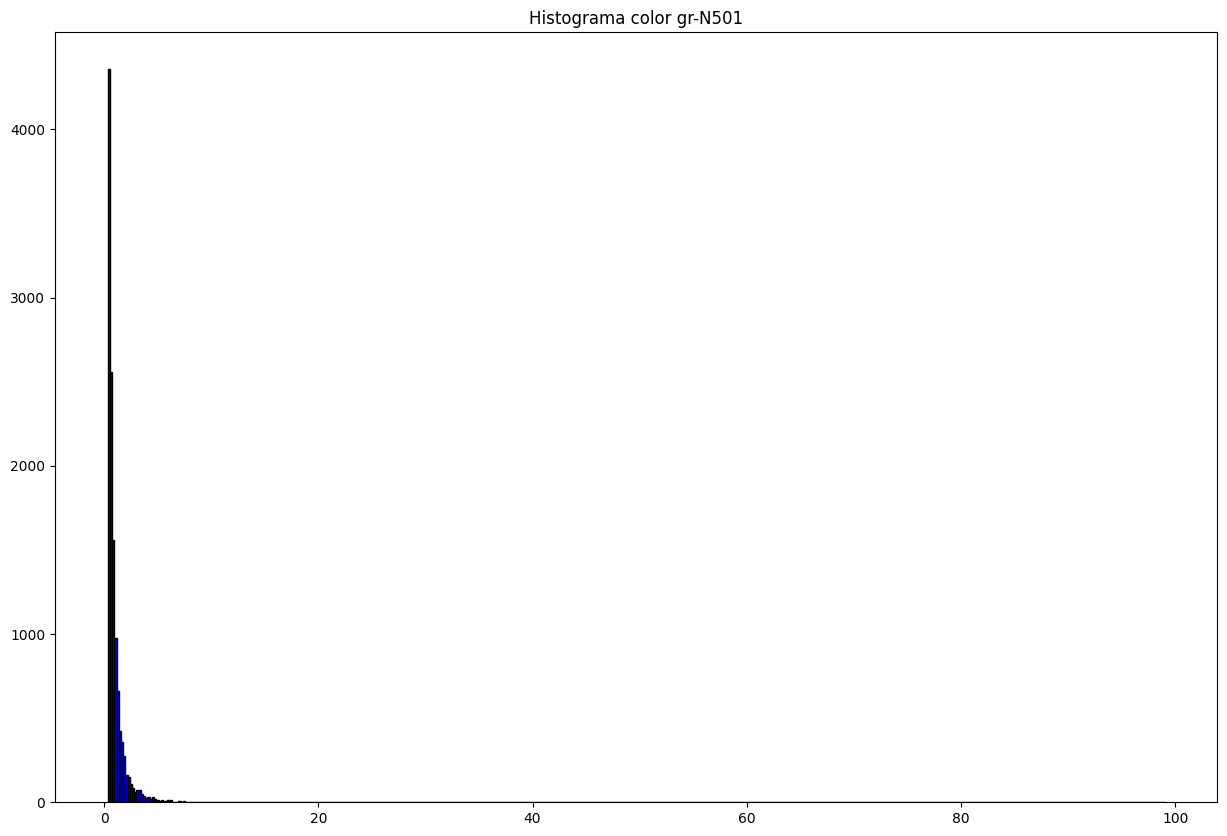

In [80]:
plt.figure(figsize=(15,10))
plt.hist(color_gr_n501, bins=bin_edges, color='blue', edgecolor='black')
plt.title('Histograma color gr-N501')

In [51]:
# Datos: magnitudes y color (eje X e Y)4
# x = dt2['MAG_APER_3']
# y = dt2['color_gr_n501']

# a = dt['MAG_APER_3']
# b = dt['color_gr_n501']

# # Calcular la densidad local de los puntos usando KDE
# xy = np.vstack([x, y])  # Crear una matriz con las coordenadas (x, y)
# z = gaussian_kde(xy)(xy)  # Calcular la densidad para cada punto

# ab = np.vstack([a,b])
# v = gaussian_kde(ab)(ab)


# # Crear el gráfico de dispersión, usando la densidad como color
# plt.figure(figsize=(18, 7))
# plt.scatter(a,b, c=v, s= 10, cmap ='gray')
# scatter = plt.scatter(x, y, c=z, s=20, cmap='plasma', edgecolor='face')

# # Añadir la barra de color
# plt.colorbar(scatter, label='Densidad')
# plt.xlim(20,26)
# plt.ylim(-1,4)
# # Etiquetas y título
# plt.xlabel('N501 magnitude')
# plt.ylabel('Color (gr - N501)')
# plt.title('Densidad de galaxias con barra de color en el diagrama color-magnitud SHELA P12')

# # Mostrar gráfico
# plt.show()


In [52]:
# a = dt['MAG_APER_3']
# b = dt['color_gr_n501']

# ab = np.vstack([a,b])
# v = gaussian_kde(ab)(ab)
# plt.plot(a, b, c=z, s=20, cmap='gray', edgecolor='face')
# plt.xlim(10,30)
# plt.ylim(-4,4)

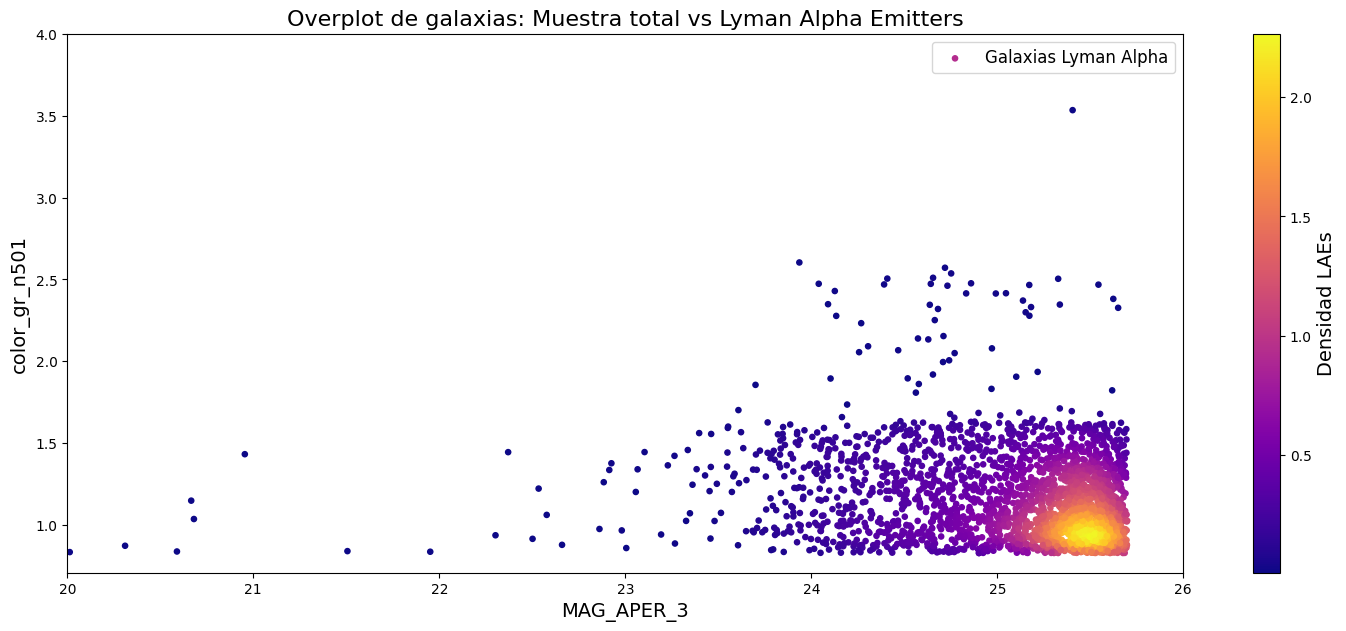

In [53]:
x = dt2['MAG_APER_3']
y = dt2['color_gr_n501']


# Calcular la densidad local de los puntos usando KDE
xy = np.vstack([x, y])  # Crear una matriz con las coordenadas (x, y)
z = gaussian_kde(xy)(xy)  # Calcular la densidad para cada punto

# Crear el gráfico
plt.figure(figsize=(18, 7))

# Graficar la muestra total de galaxias en gr
scatter = plt.scatter(x, y, c=z, s=14, cmap='plasma', edgecolor='face', label='Galaxias Lyman Alpha')

cbar = plt.colorbar(scatter, label='Densidad')
cbar.set_label('Densidad LAEs', fontsize=14)  # Ajustar tamaño de la etiqueta

# Añadir etiquetas y título
plt.xlabel('MAG_APER_3', fontsize=14)
plt.ylabel('color_gr_n501', fontsize=14)
plt.title('Overplot de galaxias: Muestra total vs Lyman Alpha Emitters', fontsize=16)
plt.xlim(20,26)
plt.ylim(0.71,4)
# Añadir la leyenda
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.show()

(3.0, 10.0)

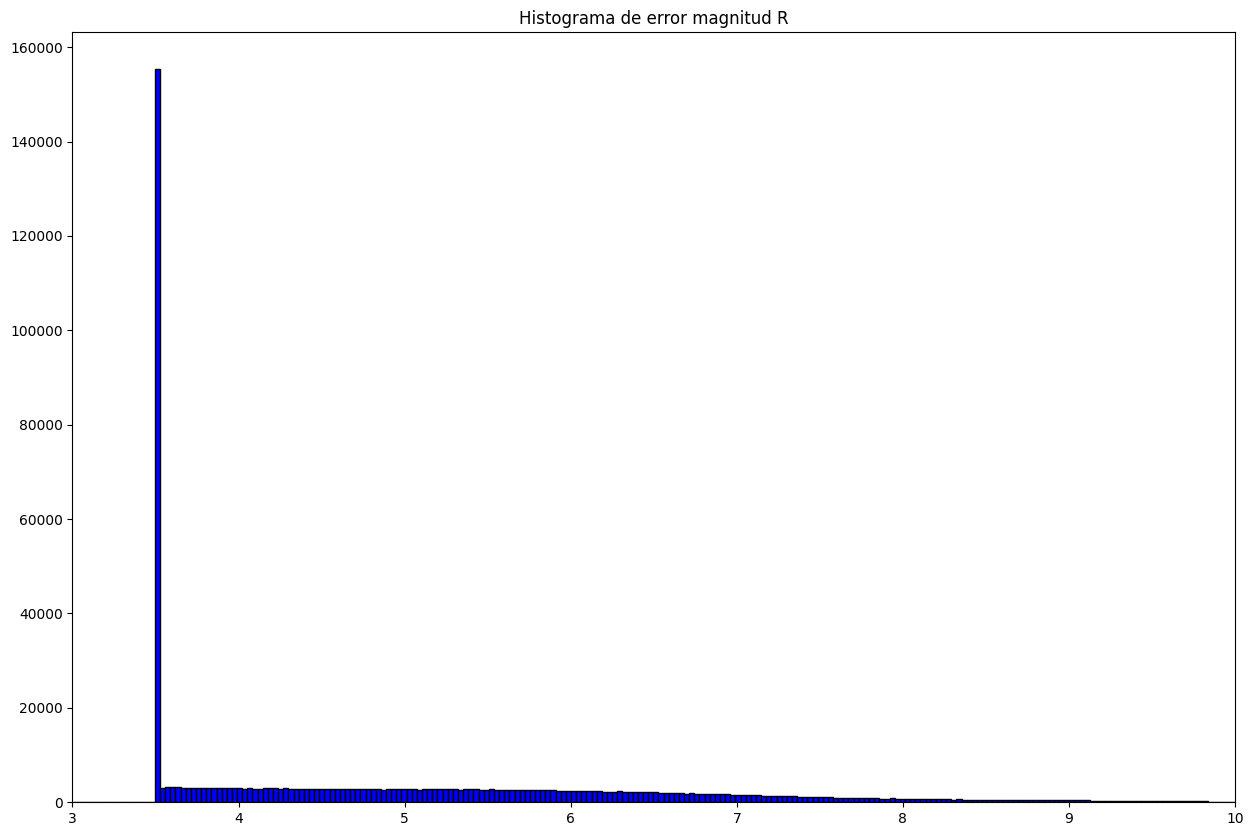

In [54]:
plt.figure(figsize=(15,10))
plt.hist(radio, bins=bin_edges, color='blue', edgecolor='black')
plt.title('Histograma de error magnitud R')
plt.xlim(3,10)

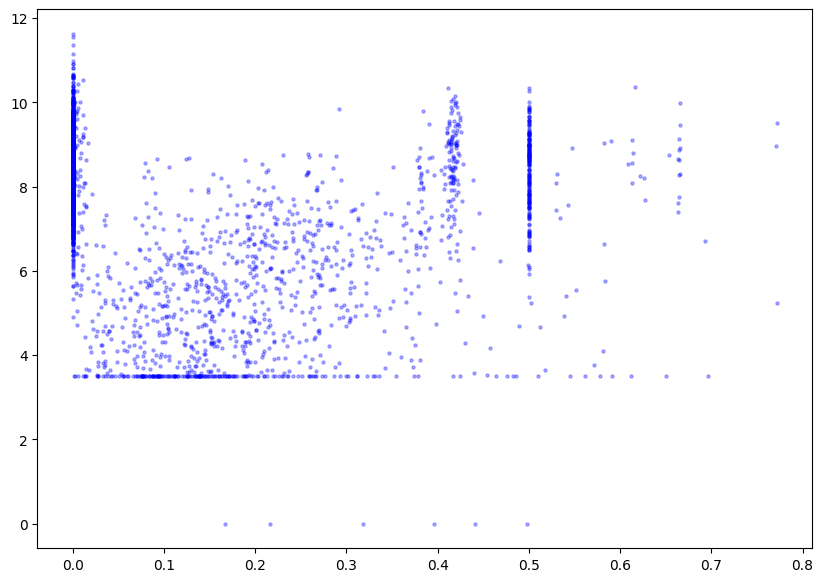

In [55]:
# Datos: magnitudes y color (eje X e Y)
y = dt2['KRON_RADIUS']  # Eje X: magnitudes
x = dt2['ELLIPTICITY']  # Eje Y: diferencia de magnitudes (color)

# Crear la figura
plt.figure(figsize=(10, 7))

# Gráfico de dispersión con transparencia (puntos de galaxias)
plt.scatter(x, y, alpha=0.3, s=5, color='blue', label='Galaxias')

plt.show()

In [56]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import norm

neff0=3.04 # número efectivo de especies relativista
h=.6736 #H0/100 km/s/Mpc
om_bar0=0.051 #parámetro de densidad bariónico a z=0
om_dm0=0.264 #parámetro de densidad de materia oscura a z=0
om_lam0=0.68 #parámetro de densidad de constante cosmológica a z=0
om_rad0=9.237e-05 #parámetro de densidad de radiación a z=0


c=299792 #km/s #velocidad de la luz
kmtoMpc=3.2408e-20 #factor de conversión de km a Mpc
H0=h*100
H0s=(H0)*kmtoMpc
c_over_H0=c*kmtoMpc/H0s #c/H0
c_over_H0
neff0=3.04
def omr(h):
    return 2.469e-5*pow(h,-2.0)*(1.0+0.2271*neff0)
class CosmologiaLCDM:
    def __init__(self,h=.70,odm0=0.27):
        #Aquí se definen los parámetros del modelo cosmológicos como propiedades de la clase
        self.h= h
        self.H0 = 100*self.h
        self.H0s = self.H0*kmtoMpc
        self.omega_dm0 = odm0 
        self.omega_rad0 = omr(h)
        self.c_over_H0=c*kmtoMpc/self.H0s
        self.omega_bar0 = om_bar0
    
    #Atributos de la clase
    def Ezmodel(self, z=0):
        #This function returns the dimensionless Friedmann equation E(z)=H(z)/H0 for LCDM
        z1=1.0+z
        
        z13=np.power(z1,3.)
        
        z14=np.power(z1,4.)
        
        OMAT=(self.omega_dm0)*z13 #Matter density (dark+baryionic) parameter as function of z
        
        ORAD=self.omega_rad0*z14 #radiation density parameter as function of z
        
        ODE=1.0- self.omega_dm0 -self.omega_rad0 #Flatness condition
        
        E=np.sqrt(OMAT +ORAD + ODE)
       
        return E
   
    def qz(self,z):
        z1=1.0+z
        z12= np.power(z1,2.)
        
        z13=np.power(z1,3.)
        
        z14=np.power(z1,4.)
        
        OMAT=(self.omega_dm0+self.omega_bar0)*z13 #Matter density (dark+baryionic) parameter as function of z
        
        ORAD=self.omega_rad0*z14 #radiation density parameter as function of z
        
        ODE=1.0- self.omega_dm0 - self.omega_bar0-self.omega_rad0 #Flatness condition
        
        E=np.sqrt(OMAT +ORAD + ODE)
        
        dedz= 3*(self.omega_dm0+self.omega_bar0)*z12+4*self.omega_rad0*z13
        
        qz = (((z + 1.0) * dedz) / (2 * E * 2)) - 1
        return qz
    
    def ageofuniverse(self,z):
        result= quad(lambda x: (1.0 / ((1.0 + x) * self.Ezmodel(x))), z, np.inf)[0]
        return result * (1 / self.H0)*977.0 #Se multiplica por 977.77 para convertir las unidades de 1/H0 a Gyr
    def distanceth(self,zl,zs):
        result1 = quad(lambda x: (1.0/self.Ezmodel(x)), zl, zs)[0]
        result2 = quad(lambda x: (1.0/self.Ezmodel(x)), 0, zs)[0]

        distanceth = result1 / result2
        return distanceth
                
    def modulo_distancia(self, z):
        return 5 * np.log10(self.DL(z) * 10**6 / 10) 
    
    def fmodel(self,z=0):
        #This function returns the inverse of the  dimensionless Friedmann equation       
        return 1.0/self.Ezmodel(z)
    
    def Dc(self,z=0):
        #This function returns the transverse comoving distance for a flat Universe  HOGG EC.(16)
        return self.c_over_H0*quad(lambda x:self.fmodel(x),0,z)[0]

    def DA(self,z=0):
        #This function returns the angular diameter distance to any source at redshift z  HOGG EC.(18)
        return (1/(1+z))*self.Dc(z)

    def DA12(self,z1=0.5,z2=2):
        #"This function returns the angular diameter distance between two objects"  HOGG EC.(19)
        return (self.c_over_H0/(1+z2))*quad(lambda x:self.fmodel(x),z1,z2)[0]

    def DL(self,z=0):
         #"This function returns the luminosity distance at redshift z"   HOGG EC.(21)
        return (1+z)*self.Dc(z)

cosmo=CosmologiaLCDM()
cosmo.ageofuniverse(2.4)

2.8202043299477544